In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
#shape of dataset
df.shape

(550068, 10)

In [4]:
#checking datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
#num of unique values in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [6]:
#checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

there aren't any missing values

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [50]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [54]:
df["Product_Category"].value_counts(ascending=True)

9        410
17       578
14      1523
19      1603
20      2550
18      3125
7       3721
12      3947
10      5125
13      5549
15      6290
16      9828
4      11753
3      20213
6      20466
2      23864
11     24287
8     113925
1     140378
5     150933
Name: Product_Category, dtype: int64

In [55]:
df['Occupation'].value_counts(ascending=True)

8      1546
9      6291
18     6622
13     7728
19     8461
11    11586
15    12165
5     12177
10    12930
3     17650
6     20355
16    25371
2     26588
14    27309
12    31179
20    33562
17    40043
1     47426
7     59133
0     69638
4     72308
Name: Occupation, dtype: int64

In [8]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

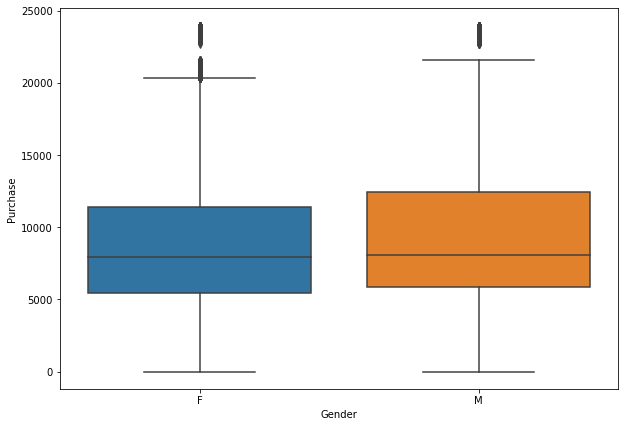

In [10]:
#checking outliers in the purchase of men and women
plt.figure(figsize=(10,7))
sns.boxplot(x="Gender",y="Purchase",data=df)
plt.show()

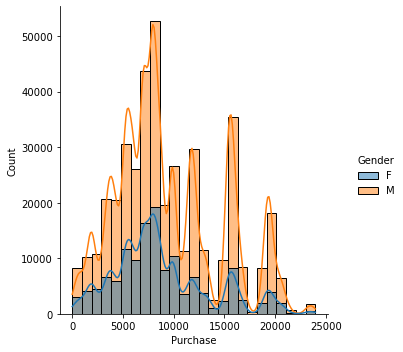

In [11]:
#before CLT
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df )

## Calculating mean of samples using CLT

### 1.For male and female

In [12]:
new_df=df.copy()

In [13]:
sample=300
iterations=1000

In [14]:
df.sample(300).groupby('Gender')['Purchase'].describe() 

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,63.0,9465.746032,4718.064987,489.0,5885.5,8122.0,11945.5,20357.0
M,237.0,9651.742616,5166.168022,61.0,6061.0,8131.0,12831.0,23953.0


In [15]:
df.sample(300).groupby('Gender')['Purchase'].describe() 

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,75.0,9141.026667,4591.668362,1716.0,6020.0,8106.0,11885.0,23197.0
M,225.0,9473.582222,4955.394869,12.0,5980.0,8259.0,12004.0,23916.0


In [16]:
#Function to find the means of samples
def clt(d,s):
    many_samples = []
    for i in range(iterations):
        many_samples.append(d.sample(s).mean())
    return many_samples

In [17]:
male_sample_means=clt(new_df[new_df["Gender"]=='M']["Purchase"],sample)

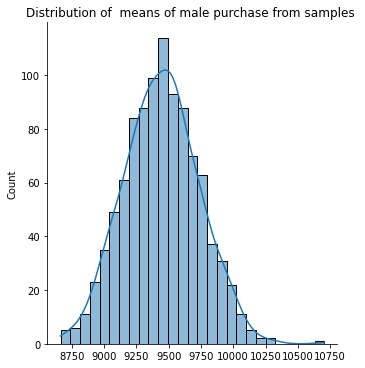

In [18]:
sns.displot(male_sample_means, kde=True )
plt.title("Distribution of  means of male purchase from samples ")
plt.show()


In [19]:
female_sample_means=clt(new_df[new_df["Gender"]=='F']["Purchase"],sample)

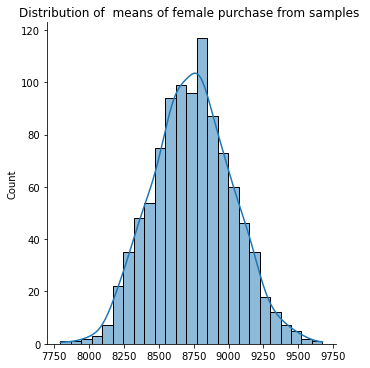

In [20]:
sns.displot(female_sample_means, kde=True )
plt.title("Distribution of  means of female purchase from samples ")
plt.show()

In [21]:
#confidence interval based on z score for 95% confidence interval
import numpy as np
male_upper_limit= np.mean(male_sample_means) + (1.96 * np.std(male_sample_means))
male_lower_limit= np.mean(male_sample_means) - (1.96 * np.std(male_sample_means))

female_upper_limit= np.mean(female_sample_means) + (1.96 * np.std(female_sample_means))
female_lower_limit= np.mean(female_sample_means) - (1.96 * np.std(female_sample_means))

In [22]:
#male purchase confidence interval
( male_lower_limit, male_upper_limit)

(8879.489336865905, 10011.636549800764)

In [23]:
#Female purchase confidence interval
(female_lower_limit, female_upper_limit)

(8183.538304511438, 9296.938622155229)

In [24]:
# for sample it was
new_df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [25]:
#Since the  intervals are overlapping we can not say males are spending more than females. 

### 2.For marital status

In [26]:
#number of unique Married and unmarried customers in the sample
df.groupby("Marital_Status")["User_ID"].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [27]:
#before CLT
df.groupby("Marital_Status")["User_ID"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,1.002999e+06,1700.465995,1000001.0,1001524.0,1003065.0,1004386.0,1006040.0
1,225337.0,1.003071e+06,1765.090842,1000004.0,1001506.0,1003093.0,1004647.0,1006039.0


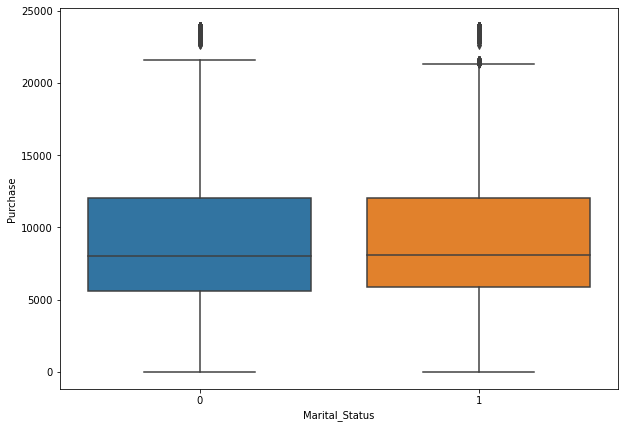

In [28]:
#checking outliers in the purchase of Married  and Unmarried
plt.figure(figsize=(10,7))
sns.boxplot(x="Marital_Status",y="Purchase",data=df)
plt.show()

In [29]:
sample=300
iterations=1000

In [30]:
#unmarried CLT
unm=new_df[new_df["Marital_Status"]==0]

In [31]:
#using clt function which was created previously
unmarried_sample_means=clt(unm["Purchase"],sample)

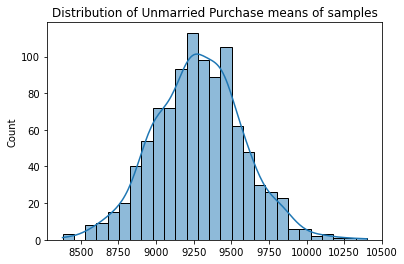

In [32]:
sns.histplot(unmarried_sample_means,kde=True)
plt.title("Distribution of Unmarried Purchase means of samples")
plt.show()

In [33]:
#married CLT
mm=new_df[new_df["Marital_Status"]==0]
married_sample_means=clt(mm["Purchase"],sample)

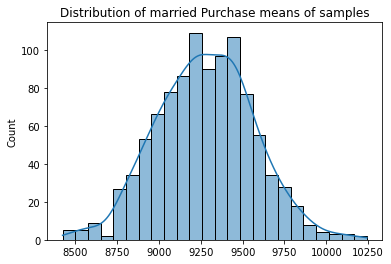

In [34]:
sns.histplot(married_sample_means,kde=True)
plt.title("Distribution of married Purchase means of samples")
plt.show()

In [35]:
#confidence interval based on z score for 95% confidence interval
import numpy as np
unmarried_upper_limit= np.mean(unmarried_sample_means) + (1.96 * np.std(unmarried_sample_means))
unmarried_lower_limit= np.mean(unmarried_sample_means) - (1.96 * np.std(unmarried_sample_means))

married_upper_limit= np.mean(married_sample_means) + (1.96 * np.std(married_sample_means))
married_lower_limit= np.mean(married_sample_means) - (1.96 * np.std(married_sample_means))
#we can also solve this using IQR method

In [36]:
(unmarried_lower_limit,unmarried_upper_limit)

(8707.568657222886, 9857.47846277711)

In [37]:
(married_lower_limit,married_upper_limit)

(8711.168615107412, 9846.172984892588)

In [38]:
#since the intervals are overlapping we cannot say that unnmarried has more Purchases than married.

### 3.For Ages

In [39]:
df['Age'].value_counts(ascending =True)

0-17      15102
55+       21504
51-55     38501
46-50     45701
18-25     99660
36-45    110013
26-35    219587
Name: Age, dtype: int64

In [40]:
df.groupby("Age")["User_ID"].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

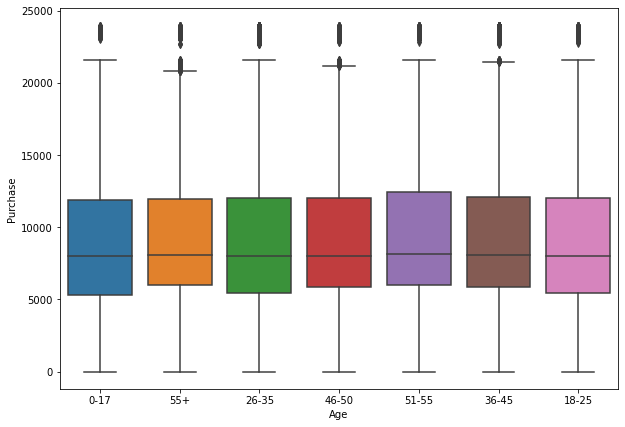

In [41]:
#Checking outliers in Ages from the sample.
plt.figure(figsize=(10,7))
sns.boxplot(x="Age",y="Purchase",data=df)
plt.show()

In [42]:
age_list=[]
for age_bin in sorted(set(df["Age"])):
    age_list.append(age_bin)
age_list

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [43]:
means_list=[]
for i in age_list:
    means_list.append(clt(df[df["Age"].str.contains(i)]["Purchase"],sample))

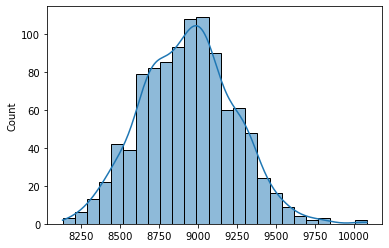

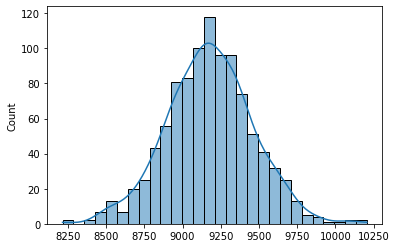

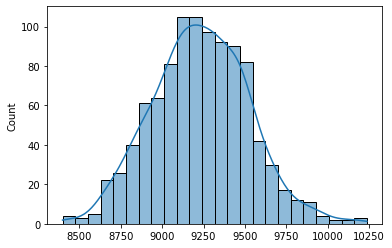

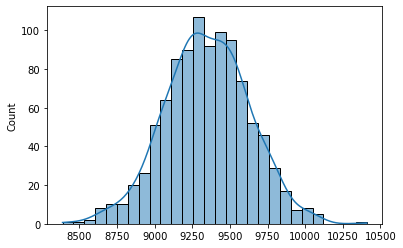

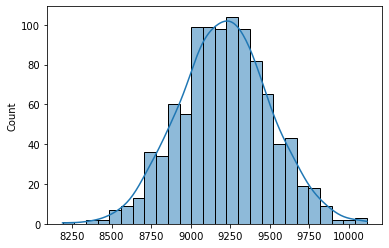

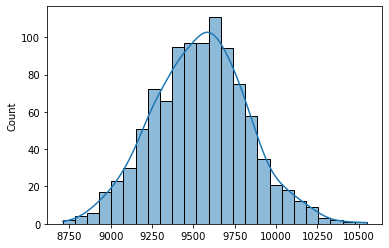

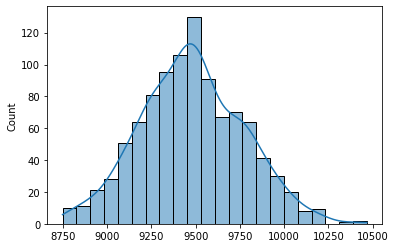

In [44]:
for sample_means in means_list:
    sns.histplot(sample_means,kde=True)
    plt.show()


In [45]:
for i in range(len(means_list)):
    age_upper_limit= np.mean(means_list[i]) + (1.96 * np.std(means_list[i]))
    age_lower_limit= np.mean(means_list[i]) - (1.96 * np.std(means_list[i]))
    if i==0:
        print("0-17_LL:",age_lower_limit,"0-17_LL:",age_upper_limit)
    if i==1:
        print("18-25_LL:",age_lower_limit,"18-25_UP:",age_upper_limit)
    if i==2:
        print("26-35_LL:",age_lower_limit,"26-35_UP:",age_upper_limit)
    if i==3:
        print("36-45_LL:",age_lower_limit,"36-45_UP:",age_upper_limit)
    if i==4:
        print("46-50_LL:",age_lower_limit,"46-50_UP:",age_upper_limit)
    if i==5:
        print("51-55_LL:",age_lower_limit,"51-55_UP:",age_upper_limit)
    if i==6:
        print("55+_LL:",age_lower_limit,"55+_UP:",age_upper_limit)
        

0-17_LL: 8357.72516919357 0-17_LL: 9509.590517473098
18-25_LL: 8621.77197458248 18-25_UP: 9731.159905417524
26-35_LL: 8663.15634338328 26-35_UP: 9799.834696616721
36-45_LL: 8800.785527885302 36-45_UP: 9894.535025448033
46-50_LL: 8654.191370019767 46-50_UP: 9771.570836646903
51-55_LL: 8987.331107026059 51-55_UP: 10096.033632973938
55+_LL: 8911.645751175593 55+_UP: 10046.048335491074


In [46]:
#all the confidence intervals are overlapping so we cant say which age group has most purchases

### mulitvariate analysis

<AxesSubplot:>

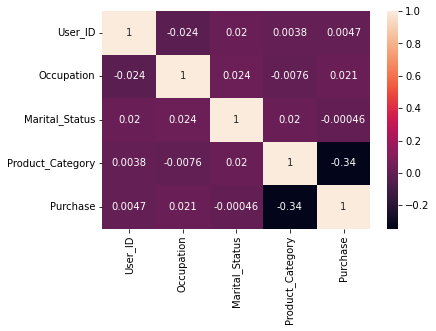

In [47]:
sns.heatmap(df.corr(),annot =True)

In [48]:
#not much of correlation can be obsereved from the sample data

### Insights:

1)There are no null values in the data.

2)Outliers are found in Purchase category but we have no need to remove them as they are needed for evaluation.

3)From the Male and female sample means we found using CLT with 95% confidence we can say that the intervals of mean Purchase intervals of both male and female are overlapping.

4)The  purchase  of both married and unmarried customers are overlapping.

5)The purchase of all the age groups are also overlapping.

6)There is also no correlation found between any of the categories in the data.

7)The means of male and female doesn't seems to vary much so we cannot treat Male and female differently during the sale.

8)The average purchases of different categories in the Marital status  and the different age group of the customers doesn't affect the purchases so we can't consider them differently as there is no bias.

9)There seems to be no sampling bias in the data and we use this data as it is for analysis.

### Recommendations:


1)Walmart has a majority of male customers. Also on an average Walmart's male customers spend more than its female customers. Keeping customer acquisition in mind Walmart can provide some extra discounts on women's day to attract female population

2)Maximum of Walmart's customers are in age group of 26-35 and least number of customers in age group of 0-17 and 55+. On the other hand, customers in age group of 51-55 make more purchase. Hence giving student discounts and senior citizens discounts can attract customers from age group of 0-17 and 55+

3)Has majority of its customers from city category B. Providing discounts to customers in city A and C or advertising more in these cities can help in attracting customers from these cities.

4)Product categories 7, 9, 14, 17, 18, 19 and 20 are least purchased products. Advertising these products more can help increase demand for these products

5)8,9, 13, 18 occupation level customers are least in Walmart. Targeting these level customers by advertising more to them can help acquire more customers from these levels.
